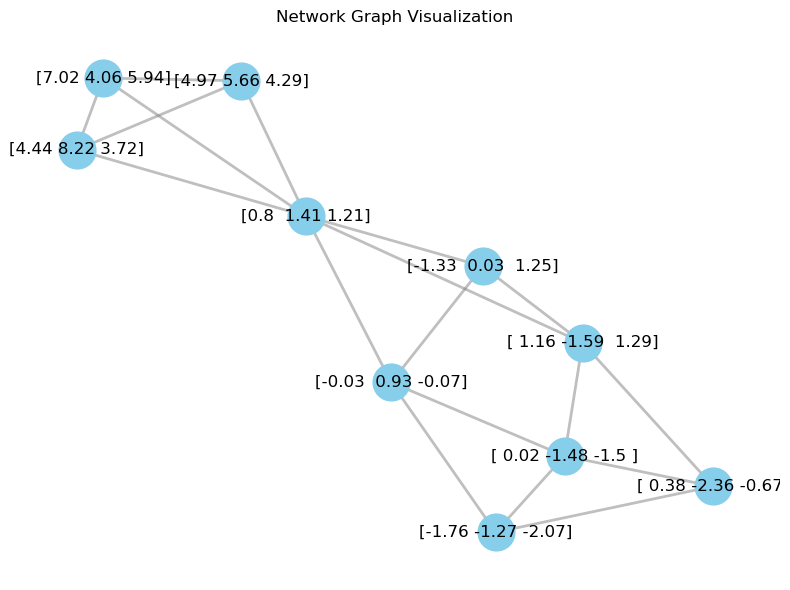

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Constants
N_NODES = 10
N_COMPONENTS = 2
N_SAMPLES = 1  # Each node gets one sample from the GMM
DIMENSION = 3  # Dimension of the data

# Parameters of the Gaussian Mixture Model
means = np.array([[0, 0, 0], [5, 5, 5]])  # Different means
cov = 3*np.eye(DIMENSION) # np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Identical covariance matrix
weights = (1/N_COMPONENTS)*np.ones(N_COMPONENTS)  # Equal weights for simplicity

# Generate samples from Gaussian mixture model
samples = []
for _ in range(N_NODES):
    component = np.random.choice(N_COMPONENTS, p=weights)
    sample = np.random.multivariate_normal(mean=means[component], cov=cov, size=N_SAMPLES)
    samples.append(sample)

# Create a networkx graph and assign samples to nodes
G = nx.Graph()
for i in range(N_NODES):
    G.add_node(i, sample=samples[i])

# Compute all-pair Euclidean distances between node samples
sample_matrix = np.vstack([G.nodes[i]['sample'] for i in G.nodes])
distances = cdist(sample_matrix, sample_matrix)

nrneighbours = 3

# Connect each node to the two closest other nodes
for i in G.nodes:
    distances[i, i] = np.inf  # Ignore self-distances by setting them to infinity
    closest_nodes = np.argsort(distances[i])[:nrneighbours]  # Get indices of two closest nodes
    for j in closest_nodes:
        G.add_edge(i, j)

# Visualization of the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')

# Draw node labels
labels = {i: f'{np.array_str(G.nodes[i]["sample"].flatten(), precision=2)}' for i in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=12)

plt.title("Network Graph Visualization")
plt.axis('off')  # Turn off the axis
plt.tight_layout()
plt.show()

